In [1]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# load modeling libraries 
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("D:\\practice_data_set\\bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
df.shape

(11162, 17)

In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


<Axes: xlabel='deposit', ylabel='Count'>

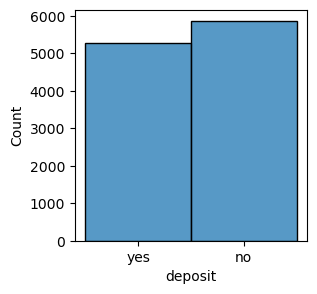

In [5]:
fig = plt.figure(figsize=(3,3))
sns.histplot(df.deposit)

In [6]:
# Understand data with perspective
df['balance'].max(),df['balance'].min()

(81204, -6847)

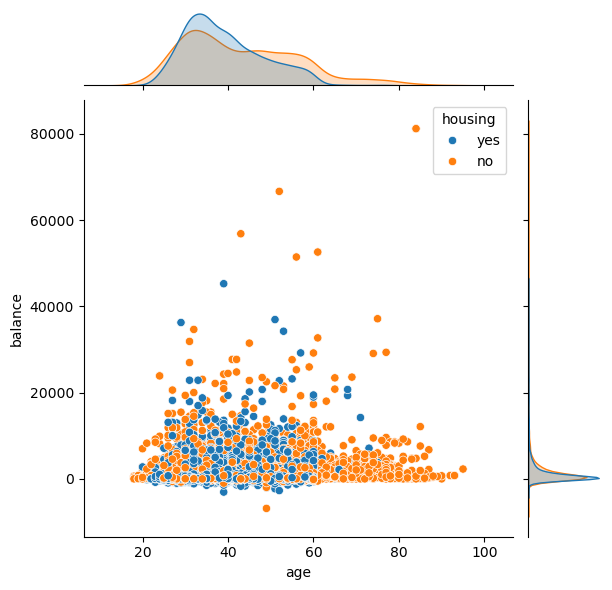

In [7]:
sns.jointplot(x = "age", y = "balance",
             hue = "housing",
             data = df)

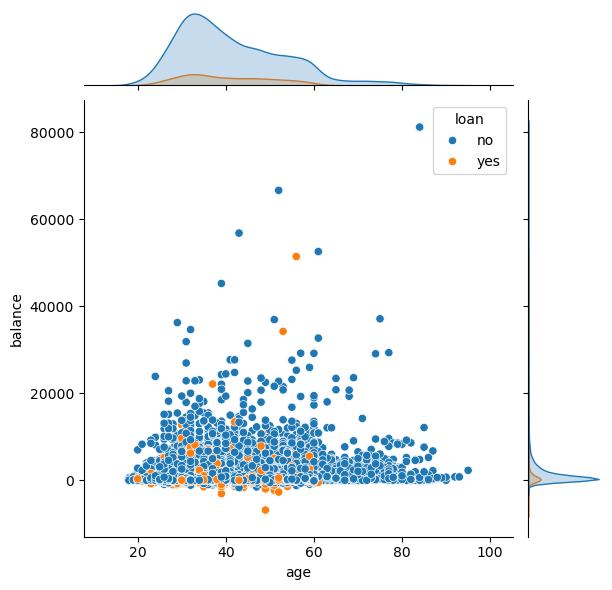

In [8]:
sns.jointplot(x = "age", y = "balance",
             hue = "loan",
             data = df)

# data cleaning and processing

In [9]:
# check missing values
print(df.isna().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


In [10]:
df.duplicated().sum()

0

In [11]:
df.duplicated().value_counts()

False    11162
Name: count, dtype: int64

In [12]:
df.nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

In [13]:
df['job'].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [14]:
df['education'].unique()

array(['secondary', 'tertiary', 'primary', 'unknown'], dtype=object)

In [15]:
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [16]:
# Replace method: Mode value
# Replace method for "unknown" variable in ["job", "education", "contact"].
df["job"].replace(["unknown"],df["job"].mode(),inplace = True)
df["education"].replace(["unknown"],df["education"].mode(),inplace = True)
df["contact"].replace(["unknown"],df["contact"].mode(),inplace = True)

In [17]:
df['contact'].unique()

array(['cellular', 'telephone'], dtype=object)

In [18]:
# remove irrelevant columns
data = df.drop(['month','day'],axis=1)

In [19]:
data.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,cellular,1042,1,-1,0,unknown,yes


In [20]:
# label encoding
le = LabelEncoder()
data['job'] = le.fit_transform(data['job'])
data['marital'] = le.fit_transform(data['marital'])
data['education'] = le.fit_transform(data['education'])
data['default'] = le.fit_transform(data['default'])
data['housing'] = le.fit_transform(data['housing'])
data['loan'] = le.fit_transform(data['loan'])
data['contact'] = le.fit_transform(data['contact'])
data['poutcome'] = le.fit_transform(data['poutcome'])
data['deposit'] = le.fit_transform(data['deposit'])

In [21]:
# standardize features
features = data.drop("deposit", axis = 1)
target = data["deposit"]
features_num = features.columns
scaler = StandardScaler()
features = pd.DataFrame(scaler.fit_transform(features))
features.columns = features_num
features.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,1.491505,-1.395985,-0.318672,-0.300320,-0.123617,0.252525,1.055280,-0.387923,-0.272963,1.930226,-0.554168,-0.481184,-0.36326,0.520705
1,1.239676,-1.395985,-0.318672,-0.300320,-0.123617,-0.459974,-0.947616,-0.387923,-0.272963,3.154612,-0.554168,-0.481184,-0.36326,0.520705
2,-0.019470,1.431163,-0.318672,-0.300320,-0.123617,-0.080160,1.055280,-0.387923,-0.272963,2.929901,-0.554168,-0.481184,-0.36326,0.520705
3,1.155733,0.802908,-0.318672,-0.300320,-0.123617,0.293762,1.055280,-0.387923,-0.272963,0.596366,-0.554168,-0.481184,-0.36326,0.520705
4,1.071790,-1.395985,-0.318672,1.231052,-0.123617,-0.416876,-0.947616,-0.387923,-0.272963,0.867171,-0.186785,-0.481184,-0.36326,0.520705


In [22]:
# export clean and processed data
final_data = pd.concat([features, target], axis=1,)
final_data.to_csv("final_version.csv")

In [24]:
# Training, Test, & Split
y = final_data["deposit"]
X = final_data.drop("deposit",axis = 1)
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)

# Build baseline model

In [25]:
# Random forest Model 1: Baseline
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [26]:
# Evaluate model
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[1441  281]
 [ 321 1306]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1762
           1       0.80      0.82      0.81      1587

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

Accuracy: 0.820244849208719


# Feature Importance

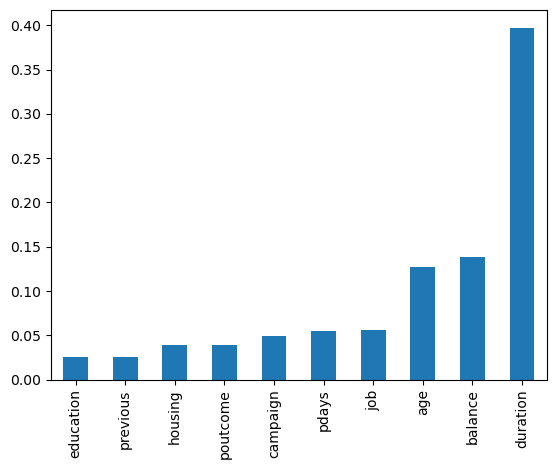

<Figure size 500x500 with 0 Axes>

In [27]:
# selecting the data
rf = RandomForestClassifier(random_state=42)
# fitting the data
rf.fit(X_train, y_train)
# predicting the data
y_pred = rf.predict(X_test)
# feature importances
rf_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values().tail(10)
# plotting bar chart according to feature importance
rf_importances.plot(kind='bar')
fig = plt.figure(figsize = (5,5))
plt.show()

In [29]:
imp_features = list(rf_importances.index)
imp_features

['education',
 'previous',
 'housing',
 'poutcome',
 'campaign',
 'pdays',
 'job',
 'age',
 'balance',
 'duration']

In [30]:
# data with importance feactures
X_top = final_data[imp_features]

# splitting the data
x_train,x_val,y_train,y_val = train_test_split(X_top,y, test_size=0.3, random_state=42, stratify=y)

In [31]:
# Random forest Model 2: with top features
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
# Evaluate model
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[1446  296]
 [ 316 1291]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1762
           1       0.80      0.81      0.81      1587

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

Accuracy: 0.817258883248731


# Hyper parameter tuning

In [33]:
# splitting the data
x_train,x_val,y_train,y_val = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)

# selecting the classifier
rf = RandomForestClassifier()
# selecting the parameter
param_grid = { 
'max_depth' : [4,5,6,7,8],
'criterion' :['gini', 'entropy']}
# using grid search with respective parameters
grid_search_model = GridSearchCV(rf, param_grid=param_grid)
# fitting the model
grid_search_model.fit(x_train, y_train)
# printing the best parameters
print('Best Parameters are:',grid_search_model.best_params_)

Best Parameters are: {'criterion': 'gini', 'max_depth': 8}


# final model

In [34]:
# # Random forest Model 2: hyperparameter tuning
rf = RandomForestClassifier(criterion= 'gini', max_depth= 8)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
# Evaluate model
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[1445  278]
 [ 317 1309]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1762
           1       0.81      0.82      0.81      1587

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

Accuracy: 0.8223350253807107
